## **Task 1 - Prediction using Supervised ML**


### **Submitted by - Shivank Udayawal**

### **Simple Linear Regression**

### Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

## Read the Data

In [2]:
DataFrame = pd.read_csv("http://bit.ly/w-data")

In [3]:
DataFrame.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
DataFrame.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
DataFrame.shape

(25, 2)

## Lets check the data type

In [6]:
DataFrame.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
DataFrame.count()

Hours     25
Scores    25
dtype: int64

## Let's check the summary of data

In [8]:
DataFrame.info()

# summary of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
DataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


## Total Unique Value

In [10]:
DataFrame.nunique()

Hours     23
Scores    23
dtype: int64

## Missing Value

In [11]:
DataFrame.isnull().sum()

Hours     0
Scores    0
dtype: int64

As we see, there is no missing value in the dataset. 

## Data Visualizing

Text(0.5, 1.0, 'Count Plot')

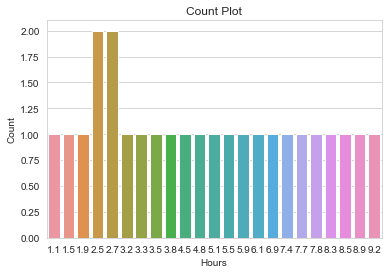

In [12]:
sns.set_style("whitegrid")
sns.countplot(x = 'Hours', data = DataFrame)
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Count Plot')

Text(0.5, 1.0, 'Count Plot')

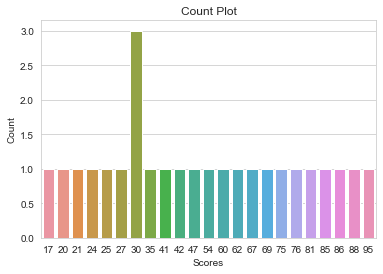

In [13]:
sns.set_style("whitegrid")
sns.countplot(x = 'Scores', data = DataFrame)
plt.xlabel('Scores')
plt.ylabel('Count')
plt.title('Count Plot')

### **Plotting the distribution of scores**

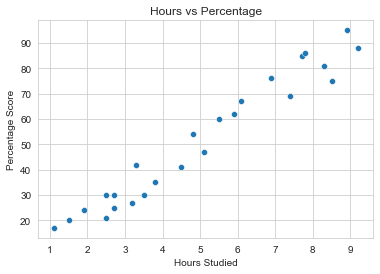

In [14]:
sns.scatterplot(x = 'Hours', y = 'Scores', data = DataFrame)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

 From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### **Preparing the data**

In [15]:
X = DataFrame.iloc[:, :-1].values  
Y = DataFrame.iloc[:, 1].values

In [16]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [17]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## Splitting the data into train & test data

In [18]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [19]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [20]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [21]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [22]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

## Perform Linear Regresssion

In [23]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


### Model Evaluation

In [24]:
slope = regressor.coef_
slope

array([9.91065648])

In [25]:
intercept = regressor.intercept_
intercept

2.018160041434683

###  Plotting the Regression Line

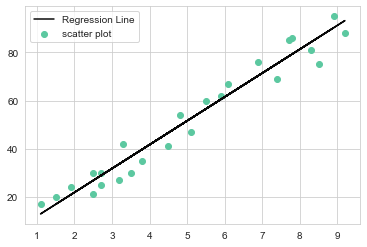

In [26]:
line = slope*X+intercept

plt.scatter(X, Y,color = "#5CC8A0" ,label = "scatter plot")
plt.plot(X, line,color = "#080808" ,label = "Regression Line");
plt.legend()
plt.show()

## Making Predictions for Scores

In [27]:
y_pred = regressor.predict(x_test) 

y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [28]:
# Comparing Actual vs Predicted
DataFrame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
DataFrame

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Predicting Scores at 9.25 hours

In [29]:
pred = regressor.predict([[9.25]])
print("No of Hours = 9.25")
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## Evaluating the model

In [30]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
